# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [5]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [8]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

---

In [9]:
df.head()

,도착 시군구 코드,자치구,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,...,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구
0,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,65,33818
1,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,70,26200
2,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,75,20342
3,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,80,16148
4,11020,중구,63495,68298,131793,25920,230,235,1588,6414,...,3138112,3050645,113.699710,110.530616,58.450528,44.128266,28733286,21692705.49,65,34257


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1  :이동 인구 수가 많으면 정류장 수도 많이 필요할 것이다.


* 가설 2  :학원 수는 정류장 수에 영향을 미칠 것이다

* 가설 3  : 승차 총 승객 수 및 하차 총 승객 수는 정류장 수에 영향을 미칠 것이다.


* 가설4: 한식 일반 음식점, 커피전문점, 기타주점업은 정류장 및 노선 수에 영향을 미칠 것이다.

* 가설5  : 택시 종사자의 수가 많으면 이동 인구가 많을 것이고 정류장 수에 영향을 미칠 것이다.

* 가설6  : 지역 인구 당 정류장 수(합계/정류장 수)는 노선 수에 영향을 줄 것이다

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [16]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

1번

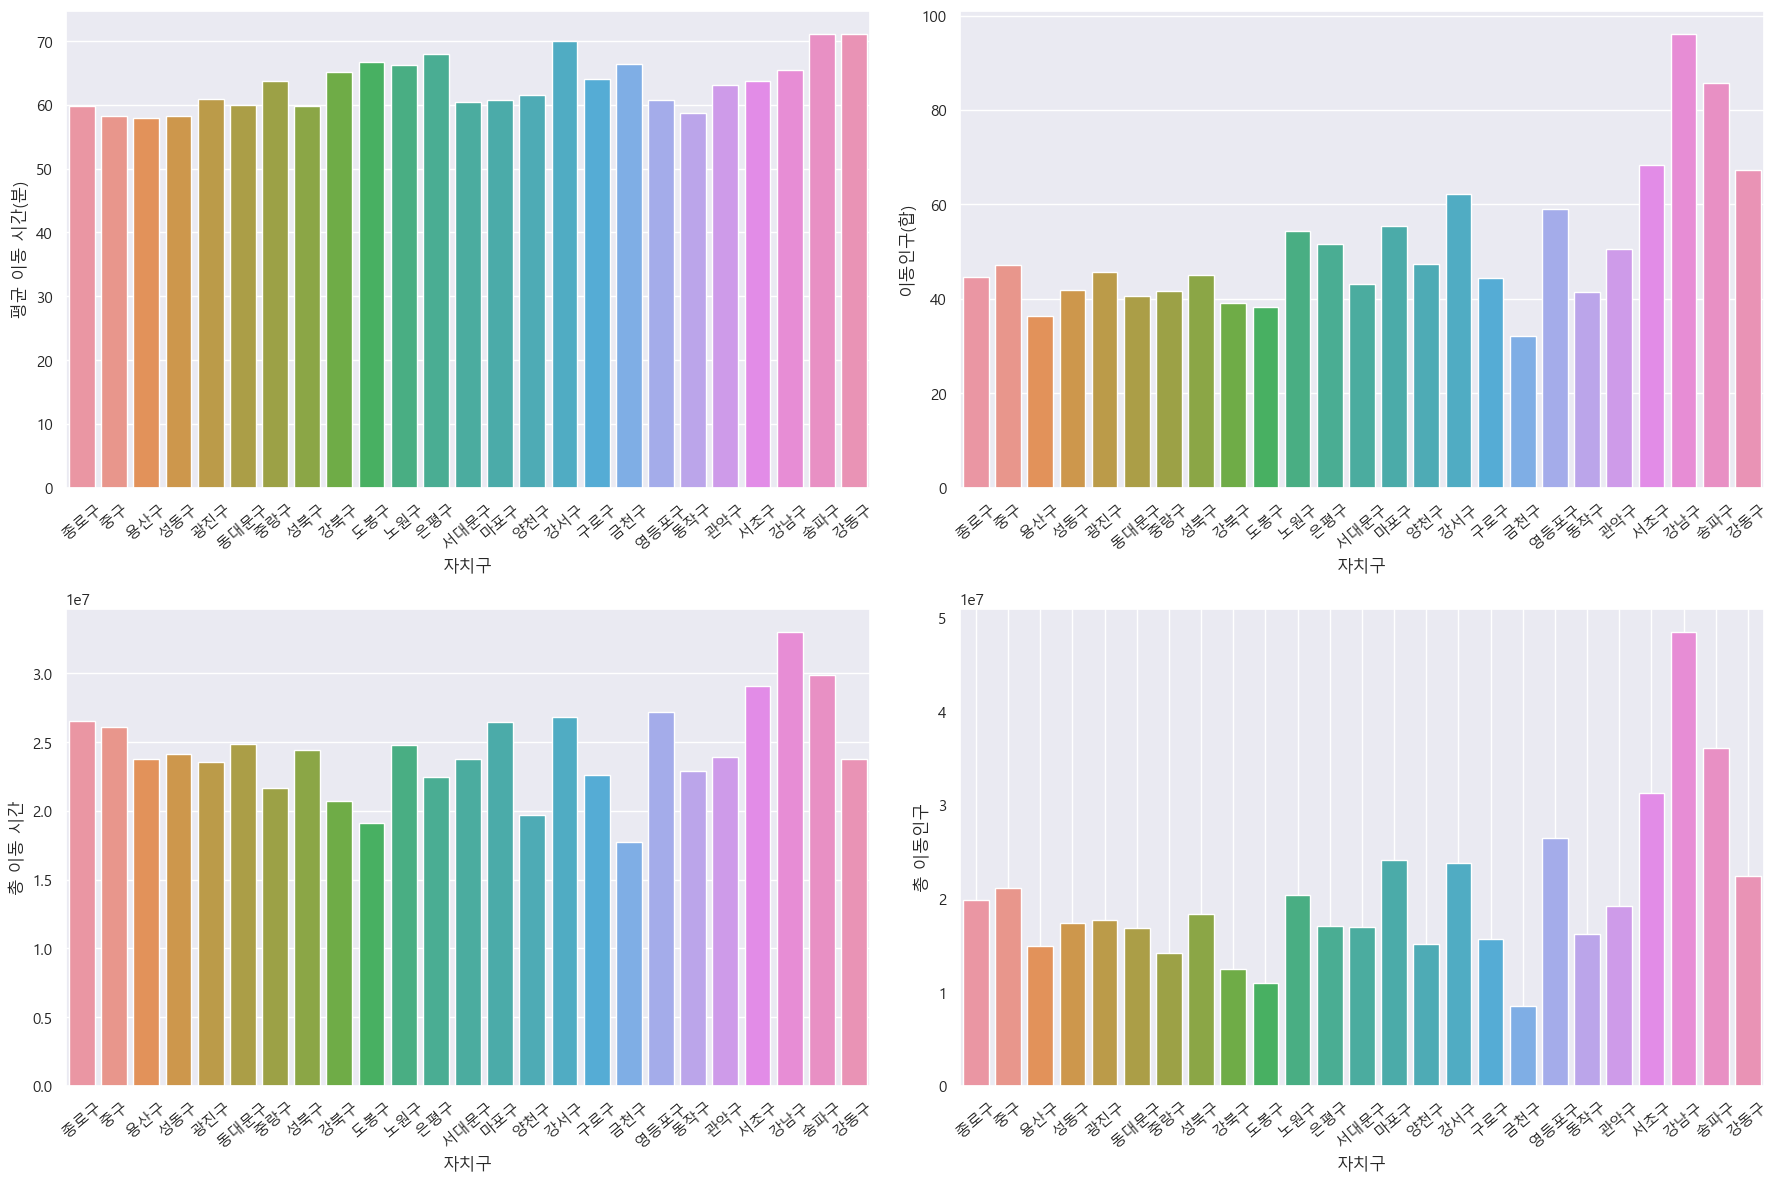

In [20]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="평균 이동 시간(분)", data=df)

plt.subplot(2, 2, 2)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="이동인구(합)", data=df)

plt.subplot(2, 2, 3)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="총 이동 시간", data=df)

plt.subplot(2, 2, 4)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="총 이동인구", data=df)

plt.tight_layout()
plt.grid()
plt.show()

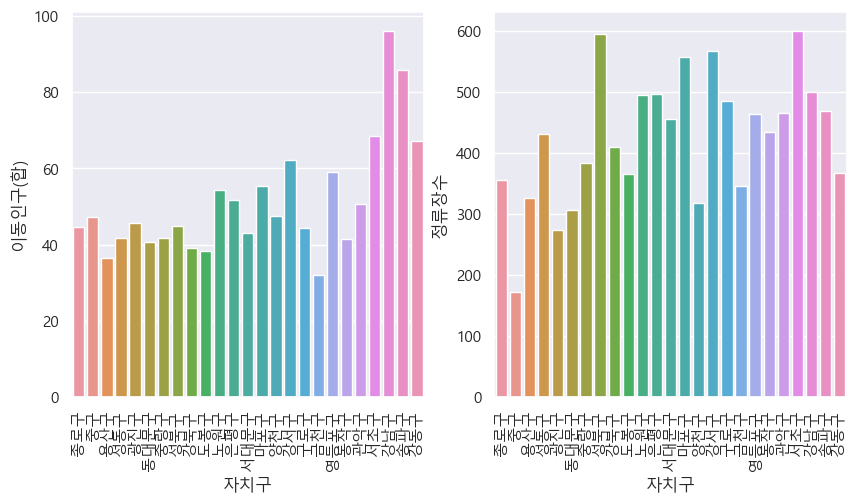

In [60]:
plt.figure(figsize = (10,5))

plt.subplot(121)
sns.barplot(x='자치구', y='이동인구(합)', data = df)
plt.xticks(rotation='vertical')

plt.subplot(122)
sns.barplot(x='자치구', y='정류장수', data = df)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
2번

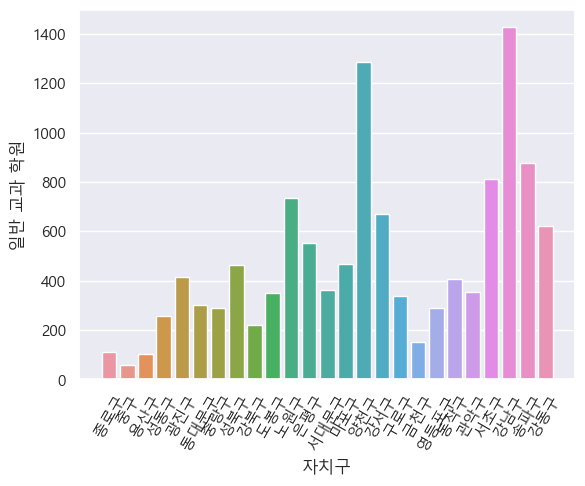

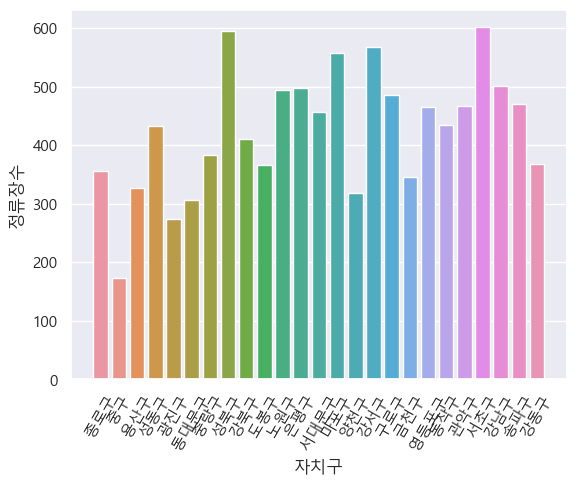

In [106]:
#df['일반 교과 학원'] = df['일반 교과 학원'].str.replace(',', '').astype(int)
sns.barplot(x = '자치구', y = '일반 교과 학원', data = df)
plt.xticks(rotation = 60)
plt.plot()
plt.show()

sns.barplot(x = '자치구', y = '정류장수', data = df)
plt.xticks(rotation = 60)
plt.plot()


plt.show()

In [ ]:
3. 번

[]

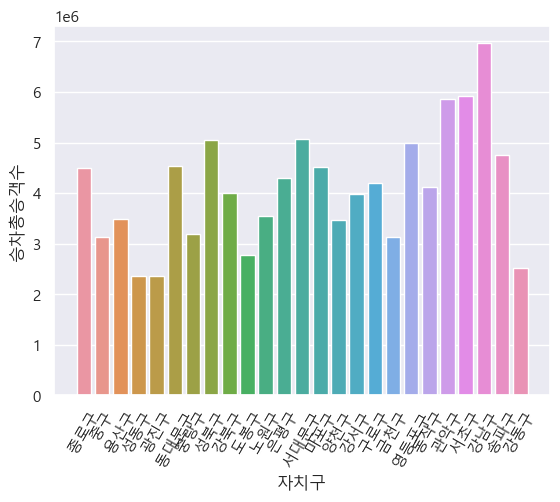

In [36]:
sns.barplot(x = '자치구', y = '승차총승객수', data = df)
plt.xticks(rotation = 60)
plt.plot()
sns.barplot(x = '자치구', y = '하차총승객수', data = df1)
plt.xticks(rotation = 60)
plt.plot()

In [ ]:
4번

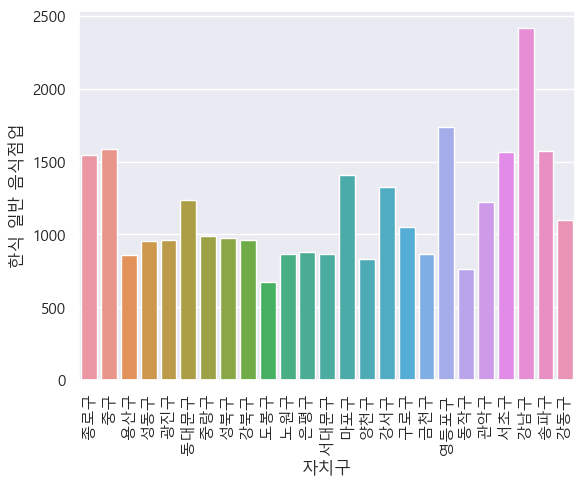

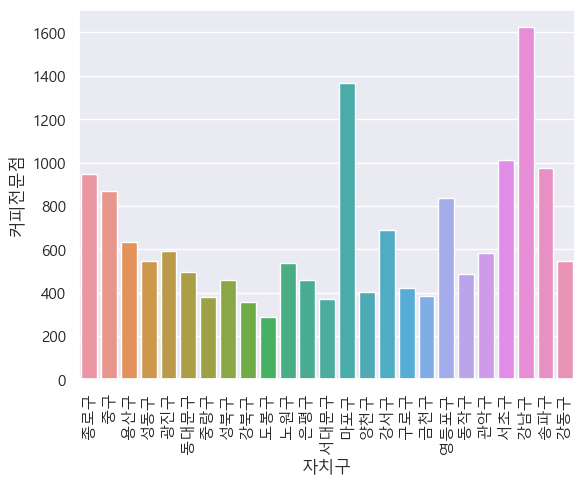

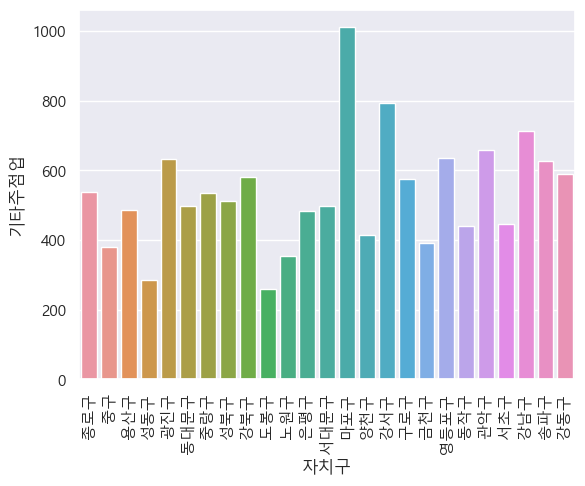

In [30]:
seoul_business = pd.read_csv('1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)
seoul_business = seoul_business.iloc[:,[0,1,4,12,16]] 
seoul_business = seoul_business.loc[seoul_business['동'] == '소계']
seoul_business = seoul_business.reset_index(drop=True)
col_list = seoul_business.columns
for col in col_list[2:]:
    seoul_business[col] = seoul_business[col].str.replace(',', '').astype(float)
sns.barplot(x='자치구', y='한식 일반 음식점업', data=seoul_business)
plt.xticks(rotation=90)
plt.show()
sns.barplot(x='자치구', y='커피전문점', data=seoul_business)
plt.xticks(rotation=90)
plt.show()
sns.barplot(x='자치구', y='기타주점업', data=seoul_business)
plt.xticks(rotation=90)
plt.show()

In [ ]:
5번

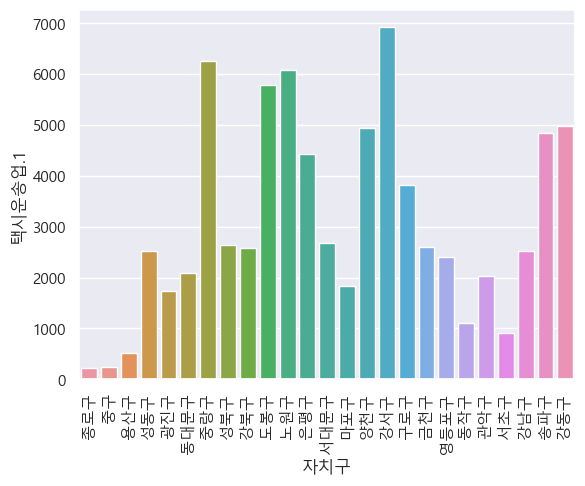

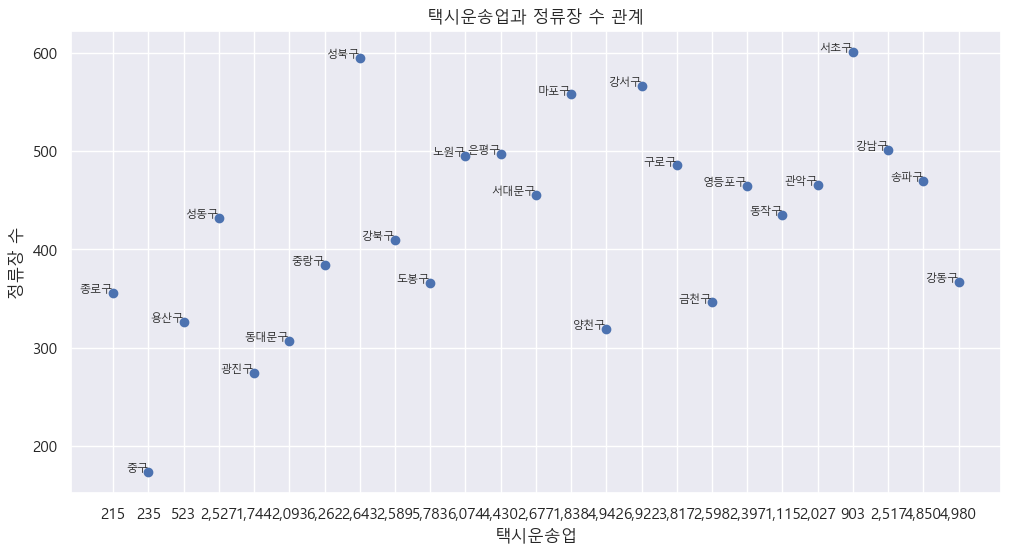

In [34]:
sb = pd.read_csv('1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)
sb = sb.iloc[:,[0, 1, 3]]
sb = sb.loc[sb['동'] == '소계']
sb = sb.reset_index(drop=True)
sb['택시운송업.1'] = sb['택시운송업.1'].str.replace(',', '').astype(float)
sns.barplot(x='자치구', y='택시운송업.1', data=sb)
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12, 6))

# 택시운송업과 정류장 수 산점도 그리기
plt.scatter(df['택시운송업.1'], df['정류장수'])

# 각 점에 자치구 이름 표시
for i, txt in enumerate(df['자치구']):
    plt.text(df['택시운송업.1'][i], df['정류장수'][i], txt, fontsize=8, ha='right')

# 축과 타이틀 설정
plt.xlabel('택시운송업')
plt.ylabel('정류장 수')
plt.title('택시운송업과 정류장 수 관계')

# 그리드 표시
plt.grid(True)

# 그래프 표시
plt.show()

In [ ]:
6번

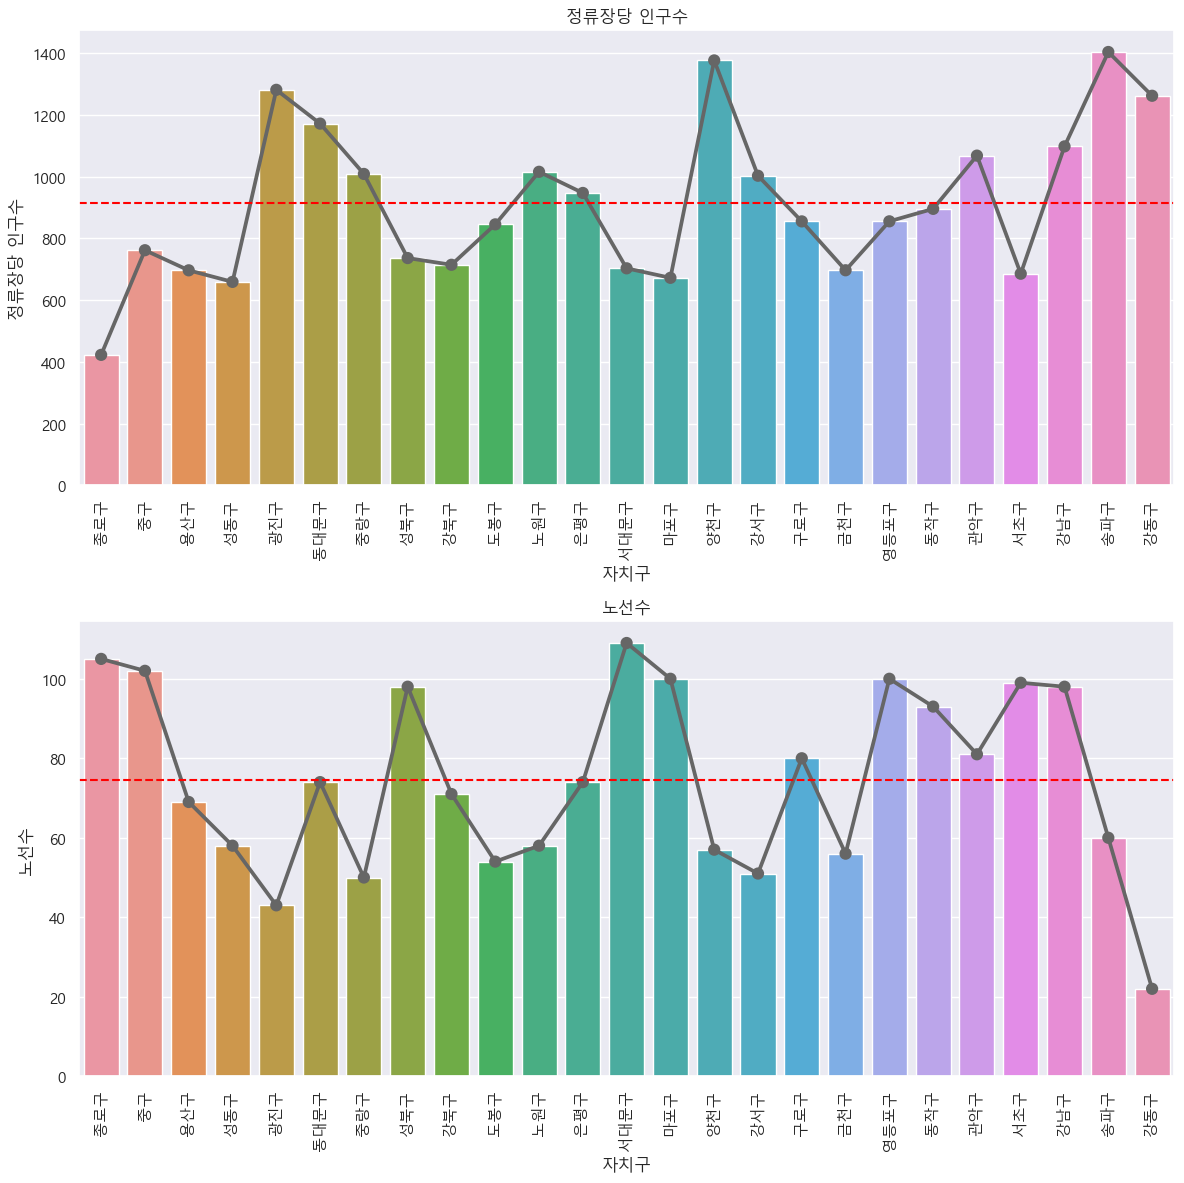

In [22]:
import warnings
warnings.filterwarnings('ignore')
df['정류장당 인구수'] = df['합계'] / df['정류장수']

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.barplot(x='자치구', y='정류장당 인구수', data=df)
sns.pointplot(x='자치구', y='정류장당 인구수', data=df, ci='sd', color='#666', estimator='mean')
plt.axhline(df['정류장당 인구수'].mean(), color='red', linestyle='--')
plt.xlabel('자치구')
plt.ylabel('정류장당 인구수')
plt.title('정류장당 인구수')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.barplot(x='자치구', y='노선수', data=df)
sns.pointplot(x='자치구', y='노선수', data=df, ci='sd', color='#666', estimator='mean')
plt.axhline(df['노선수'].mean(), color='red', linestyle='--')
plt.xlabel('자치구')
plt.ylabel('노선수')
plt.title('노선수')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [ ]:
target = 

### 1)

PearsonRResult(statistic=0.42172313865495836, pvalue=0.035751415670890414)

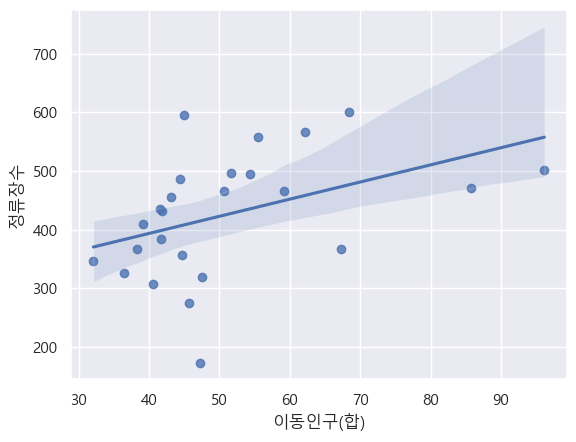

In [76]:
target = '정류장수'
feature = '이동인구(합)'
sns.regplot(x=feature, y=target, data=df)
spst.pearsonr(df[feature],df[target])

### 2)

PearsonRResult(statistic=0.3706511476647472, pvalue=0.06815684563043103)

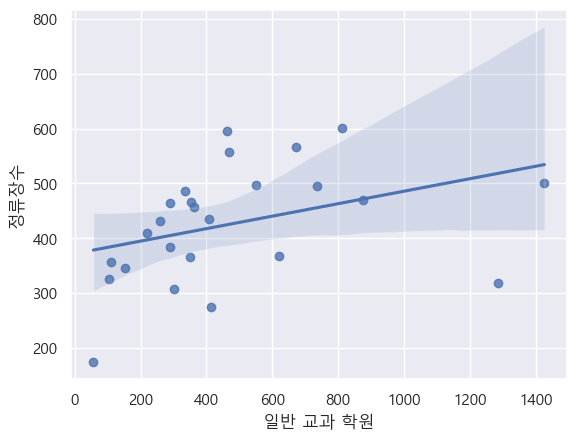

In [107]:
feature = '일반 교과 학원'
sns.regplot(x=feature, y=target, data=df)
spst.pearsonr(df[feature],df[target])

### 3)

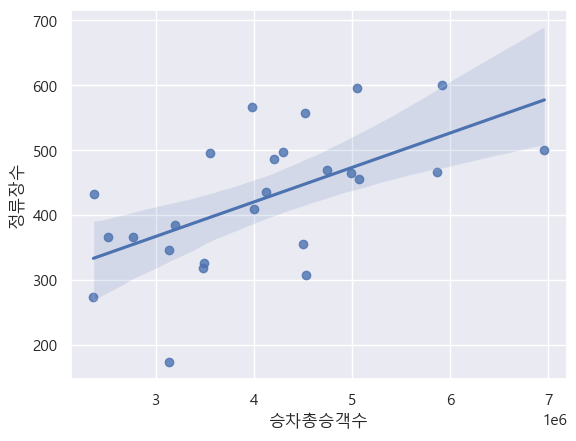

상관계수 : 0.5860112764394698, p-value : 0.002082561681352034


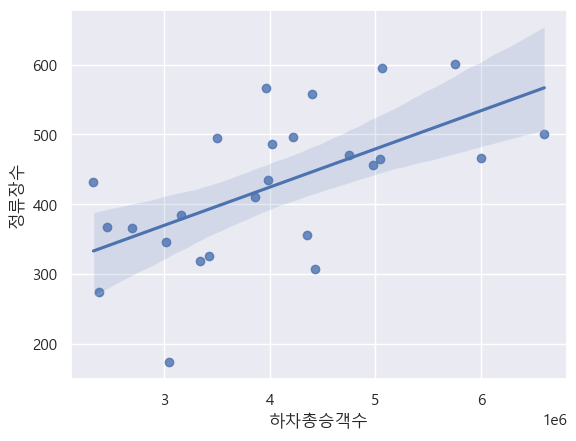

상관계수 : 0.5949530986009007, p-value : 0.0017068493886241004


In [81]:
sns.regplot(x = '승차총승객수', y = '정류장수', data = df)
plt.show()
result = spst.pearsonr(df['승차총승객수'], df['정류장수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')
sns.regplot(x = '하차총승객수', y = '정류장수', data = df)
plt.show()
result = spst.pearsonr(df['하차총승객수'], df['정류장수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

#### 4번

In [13]:
df[colu]

,도착 시군구 코드,자치구,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,...,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구
0,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,65,33818
1,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,70,26200
2,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,75,20342
3,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,80,16148
4,11020,중구,63495,68298,131793,25920,230,235,1588,6414,...,3138112,3050645,113.699710,110.530616,58.450528,44.128266,28733286,21692705.49,65,34257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11240,송파구,316981,343044,660025,108894,2638,4850,1575,5760,...,4746623,4744766,99.003483,98.964751,71.786619,79.389856,33877900,37466057.70,80,12661
96,11250,강동구,226237,237081,463318,82984,3295,4980,1101,3388,...,2515582,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,65,26278
97,11250,강동구,226237,237081,463318,82984,3295,4980,1101,3388,...,2515582,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,70,19986
98,11250,강동구,226237,237081,463318,82984,3295,4980,1101,3388,...,2515582,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,75,14786


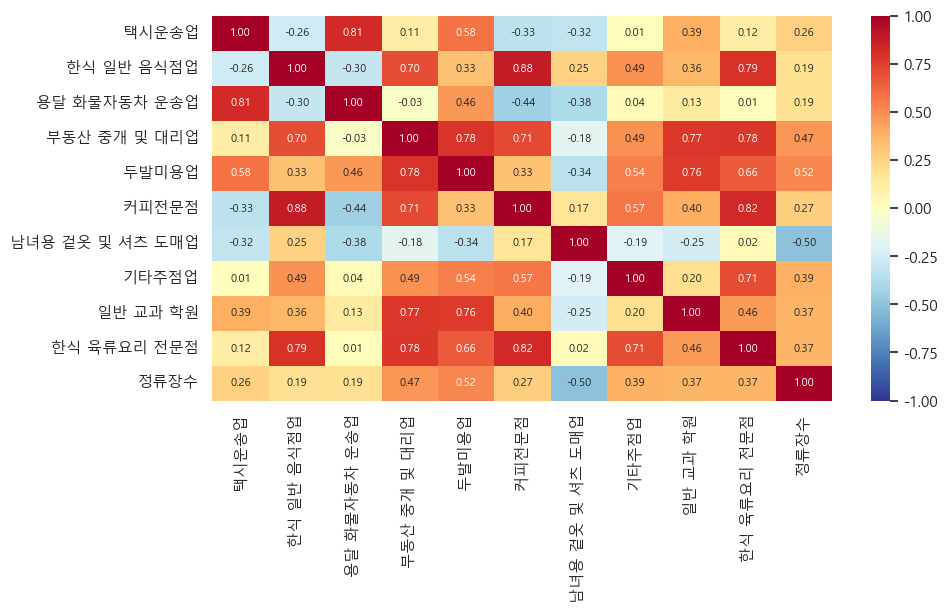

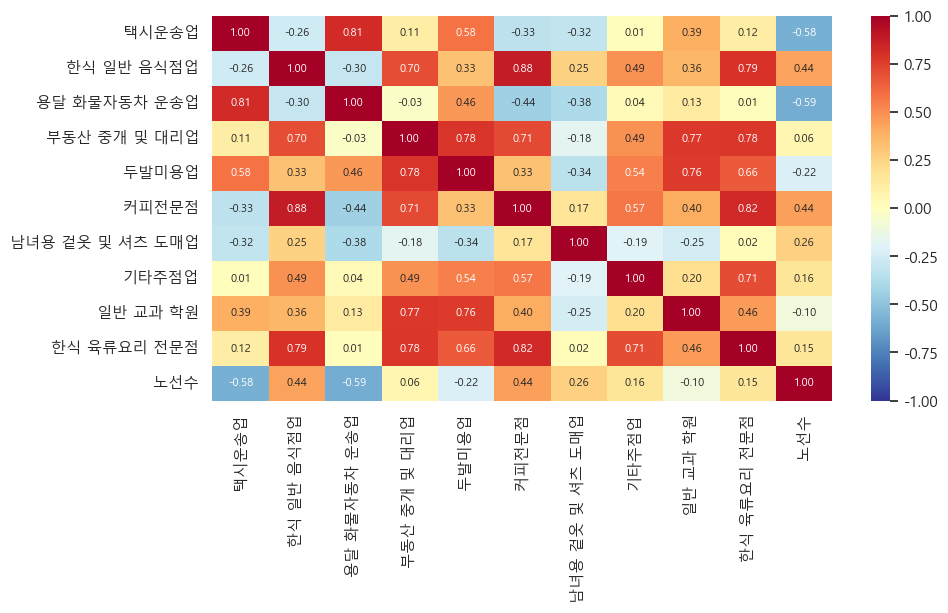

택시운송업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.2584914534688149, pvalue=0.009412226717366592)
택시운송업과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.5815497068488676, pvalue=2.229030398439256e-10)
한식 일반 음식점업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.1891789200573647, pvalue=0.059421132421033036)
한식 일반 음식점업과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.4367372205421086, pvalue=5.552792969791957e-06)
용달 화물자동차 운송업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.1932338111049693, pvalue=0.054074411084404514)
용달 화물자동차 운송업과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.5939999426388506, pvalue=7.303003454171986e-11)
부동산 중개 및 대리업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.46966615607380574, pvalue=8.23876001655431e-07)
부동산 중개 및 대리업과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.06042189414337566, pvalue=0.5503949498150549)
두발미용업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.5225484471979418, pvalue=2.4531410720577878e-08)
두발미용업과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.2213363838145403, pvalue=0.026893395

In [23]:
# 업종별 사업체
stores = df[['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',  '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점']]
stores_bus_station = df[['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',  '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점', '정류장수']]                       
stores_work_route = df[['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',  '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점', '노선수']]            
plt.figure(figsize = (10, 5))
sns.heatmap(stores_bus_station.corr(), annot = True, fmt = '.2f', annot_kws={"size": 8}, vmin=-1, vmax=1, cmap = 'RdYlBu_r')
plt.show()
plt.figure(figsize = (10, 5))
sns.heatmap(stores_work_route.corr(), annot = True, fmt = '.2f', annot_kws={"size": 8}, vmin=-1, vmax=1, cmap = 'RdYlBu_r')
plt.show()
for store in stores:
    print(store+'과 정류장 수 간의 상관계수: ', spst.pearsonr(df[store], df['정류장수']), end='\n')
    print(store+'과 노선 수 간의 상관계수: ', spst.pearsonr(df[store], df['노선수']), end='\n')

5번

In [22]:
from scipy import stats

# 피어슨 상관 계수와 p-value 계산
#pearson_corr, p_value = stats.pearsonr(df['택시운송업.1'], df['정류장수'])

# 결과 출력
#print("Pearson correlation coefficient:", pearson_corr)
#print("p-value:", p_value)
stat, pvalue = spst.pearsonr(df['택시운송업.1'], df['정류장수'])
print(f'상관계수 : {stat}')
print(f'p-value : {pvalue}')

상관계수 : 0.23023371369218495
p-value : 0.0211978781332088


In [ ]:
6번

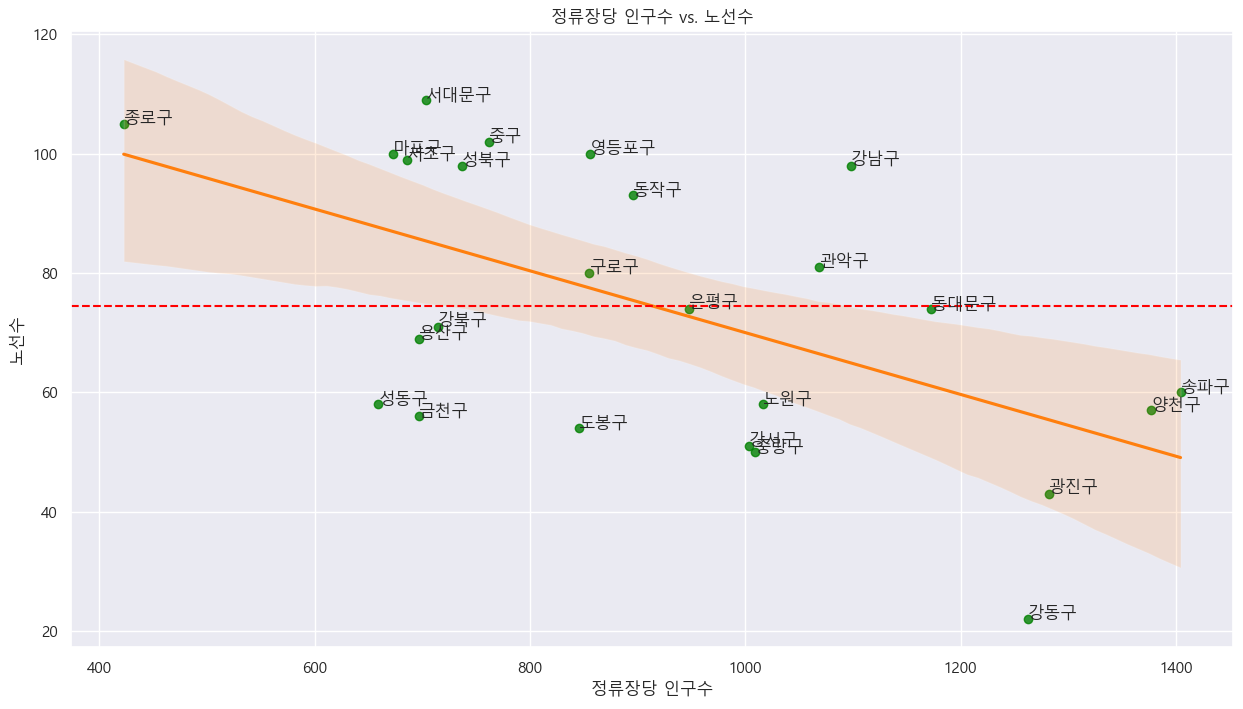

상관계수 : -0.5595193979436834
p-value : 0.003636525356503852


In [94]:
df['정류장당 인구수'] = df['합계'] / df['정류장수']
plt.figure(figsize=(15, 8))
ax = sns.regplot(x='정류장당 인구수', y='노선수', data=df, scatter_kws={'color': 'green'}, line_kws={'color': '#ff7f0e'})
plt.axhline(df['노선수'].mean(), color='red', linestyle='--')
plt.title('정류장당 인구수 vs. 노선수')
plt.xlabel('정류장당 인구수')
plt.ylabel('노선수')
plt.grid(True)
for i in range(len(df)):
    ax.text(df['정류장당 인구수'][i], df['노선수'][i], df['자치구'][i], ha='left')
plt.show()

print('='*100)
stat, pvalue = spst.pearsonr(df['정류장당 인구수'], df['노선수'])
print(f'상관계수 : {stat}')
print(f'p-value : {pvalue}')

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [19]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst
feature = '일반 교과 학원'
target = '정류장수'
spst.pearsonr(df[feature],df[target])
tmp = df.copy()
tmp.drop('자치구', axis = 1, inplace = True)

spst.pearsonr(df['이동인구(합)'],df['노선수'])

PearsonRResult(statistic=0.06696238958600603, pvalue=0.5080041563814476)

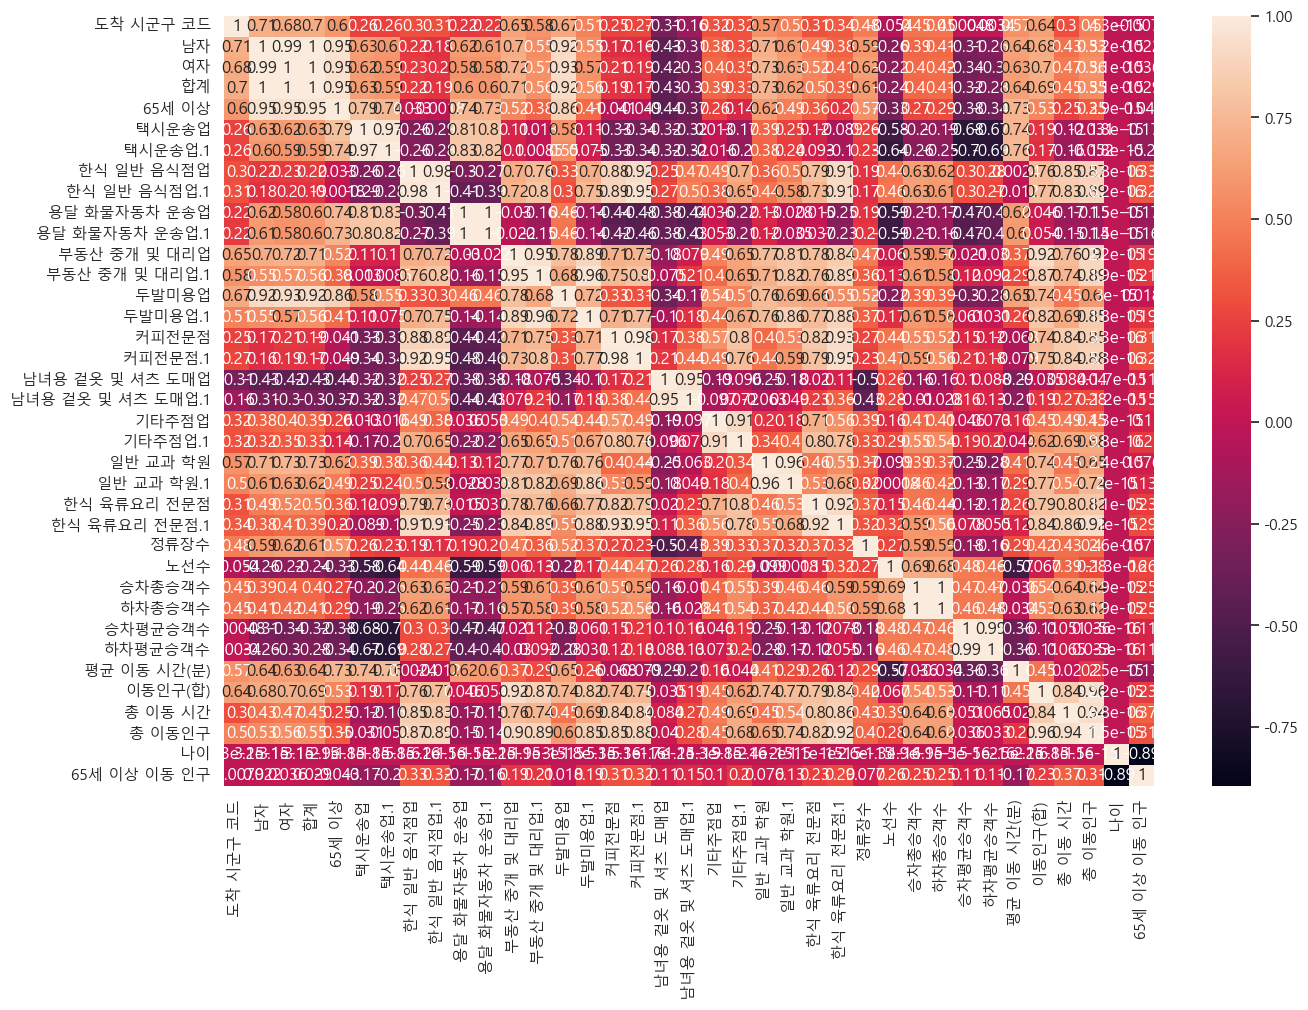

In [20]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize=(15,10))
sns.heatmap(tmp.corr(), annot = True)
plt.show()

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.